# Global Power Plant Database

# Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



# Key attributes of the database
. The database includes the following indicators:

. country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

. country_long (text): longer form of the country designation

. name (text): name or title of the power plant, generally in Romanized form

. gppd_idnr (text): 10 or 12 character identifier for the power plant

. capacity_mw (number): electrical generating capacity in megawatts

. latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

. longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

. primary_fuel (text): energy source used in primary electricity generation or export

. other_fuel1 (text): energy source used in electricity generation or export

. other_fuel2 (text): energy source used in electricity generation or export

. other_fuel3 (text): energy source used in electricity generation or export

. commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

. owner (text): majority shareholder of the power plant, generally in Romanized form

. source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

. url (text): web document corresponding to the source field

. geolocation_source (text): attribution for geolocation information

. wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

. year_of_capacity_data (number): year the capacity information was reported

. generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

. generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

. generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

. generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

. generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

. generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

. generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

. generation_data_source (text): attribution for the reported generation information

. estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

. estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

. estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

. estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

. estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

. estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

. estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

. estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

. estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017


# Prediction :
Make two prediction 1) Primary Fuel 2) capacity_mw

In [299]:
#import necessary libraries

#linear algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Data processing
import pandas as pd


#Data visulaization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ALgoridthms
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score,classification_report

#saving the model
import joblib

# Loading the Dataset

In [300]:
df=pd.read_csv('global-power-plant-database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
#checking the dimension of data

df.shape

(907, 27)

Remarks: The dataset consisys of 908 rows and 25 columns.

We are required to predict 2 labels 'primary_fuel' and 'capacity_mw'. By looking at the values present in the column 'primary_fuel', we see that there are categorical data in that colum. Considering it as our label then it will be a Classification problem.

And if we look at the values present in the column 'capacity_mw', we see that there are continous data in that column so considering it as our label, it will be a Regression problem.

# Data Exploration/Analysis


In [302]:
#checking the top 5 rows 

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [303]:
#checking last 5 rows

df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
#checking sample

df.sample(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
421,IND,India,LIGANAMAKKI,IND0000232,55.0,14.1704,74.8388,Hydro,NaN,NaN,...,2019.0,NaN,254.98865,118.3453,105.1118,124.92225,251.26735,NaN,Central Electricity Authority,NaN
821,IND,India,TUTICORIN JV,IND0000468,1000.0,8.7603,78.1699,Coal,Oil,NaN,...,2019.0,NaN,6.34865,3502.1100,5806.8510,5026.36200,5113.27100,NaN,Central Electricity Authority,NaN


In [305]:
#checking the columns names

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [306]:
#checking the datatype information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observations:

We see that there are many missing values in our dataset.

There are 13 numerical features and 12 discrete(categorical) features.

In [307]:
#checking the null values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

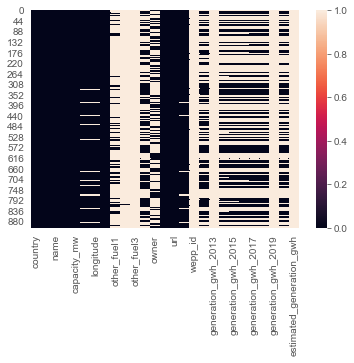

In [308]:
#heatmap for null values

sns.heatmap(df.isnull())

Remarks: We can see that there are missing values in many columns and few even have all the 908 rows empty that will need to be removed since it provides no insights.

Only 25-30% of missing value can be allowed in the dataset and greater than that need to be removed. Columns that need to be deleted are:

-other_fuel1

-other_fuel2

-other_fuel3

-owner

-wepp_id

-year_of_capacity_data

-generation_gwh_2013

-generation_gwh_2014

-generation_gwh_2015

-generation_gwh_2016

-generation_gwh_2017

-generation_data_source

-estimated_generation_gwh

# Statistical Analysis


In [309]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Observations:

We can see the columns are having different count which indicates the dataset contains missing values.

# Data pre-processing

In [310]:
#Dropping the irrelevent columns 

df.drop(columns=["url","other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)


In [311]:
df.drop(columns=["owner"],axis=1,inplace=True)

In [312]:
df.drop(columns=["generation_gwh_2019"],axis=1,inplace=True)

In [313]:
df.drop(columns=["generation_gwh_2013"],axis=1,inplace=True)

In [314]:
#checking the shape after dropping the columns

df.shape

(907, 17)

In [315]:
#checking the null values after dropping the columns

df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [316]:
#checking the unique values

df.nunique()

country                  1
country_long             1
name                   907
gppd_idnr              907
capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [317]:
# Filling null values using there median values
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2017"].median())


In [318]:
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())

In [319]:
# let's check the mode of other_fuel1 
df["other_fuel1"].mode()  # we will fill the null values using its mode


0    Oil
dtype: object

In [320]:
# let's check the mode of geolocation_source columns
df["geolocation_source"].mode()  # we will fill the null values using its mode


0    WRI
dtype: object

In [321]:
# Replacing the null valuee by its mode Oil
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])


In [322]:
# Filling null values by its mode WRI
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])


#now we filled the missing values

In [323]:
#checking the null values after filling

df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now,No null values are present 

<AxesSubplot:>

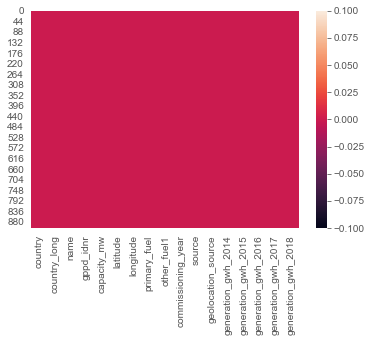

In [324]:
#heatmap for null values 

sns.heatmap(df.isnull())

Remarks: In the above cell, we see that there is no any missing values in our dataset now.

# Exploratory Data Analysis(EDA)


# Univariate Analysis:

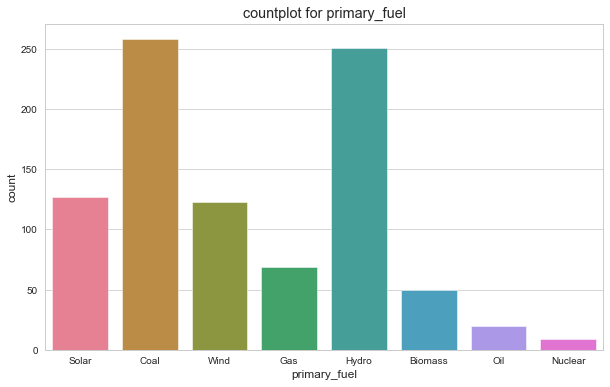

In [252]:
#checking the countplot for our target column

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(df['primary_fuel'],data=df,palette='husl')
plt.title('countplot for primary_fuel')
plt.show()

Observation: In the above plot, we can see that the highest number of values have been covered by coal and hydro fuel and, then comes solar and wind. We also see that gas, biomass, oil and nuclear have very low data counts.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


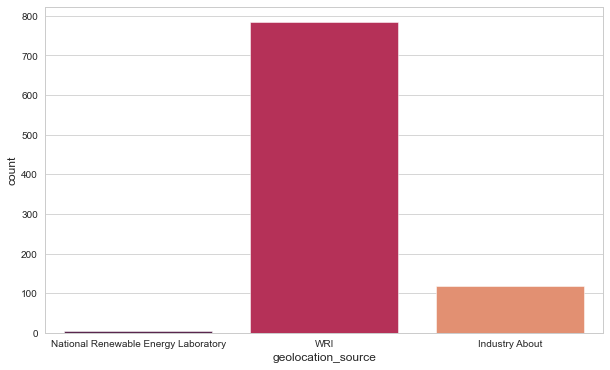

In [253]:
##checking the countplot for other_fules column

print(df['geolocation_source'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df['geolocation_source'],palette='rocket')
plt.show()

we can see that highest value count is for WRI

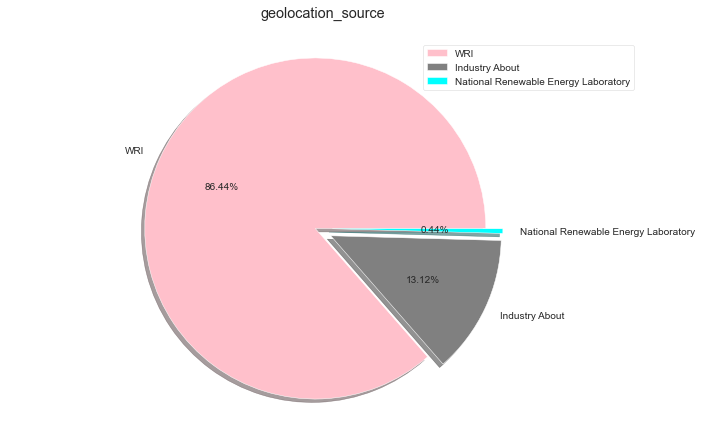

In [254]:
#checking  with pie chart
plt.figure(figsize=(10,6))
explode = [0, 0.1,0.1]
colors=['pink','gray','cyan']
plt.pie(df['geolocation_source'].value_counts(), labels=df['geolocation_source'].value_counts().index, 
        colors=colors,explode=explode,shadow=True, autopct='%1.2f%%')
plt.title('geolocation_source\n')
plt.legend(prop={'size':10})
plt.axis('equal')
plt.tight_layout()
plt.show()

As the plot shows the geological source World Resources Institute(WRI) has highest counts which means WRI gives the more geological information compare to other two sources.

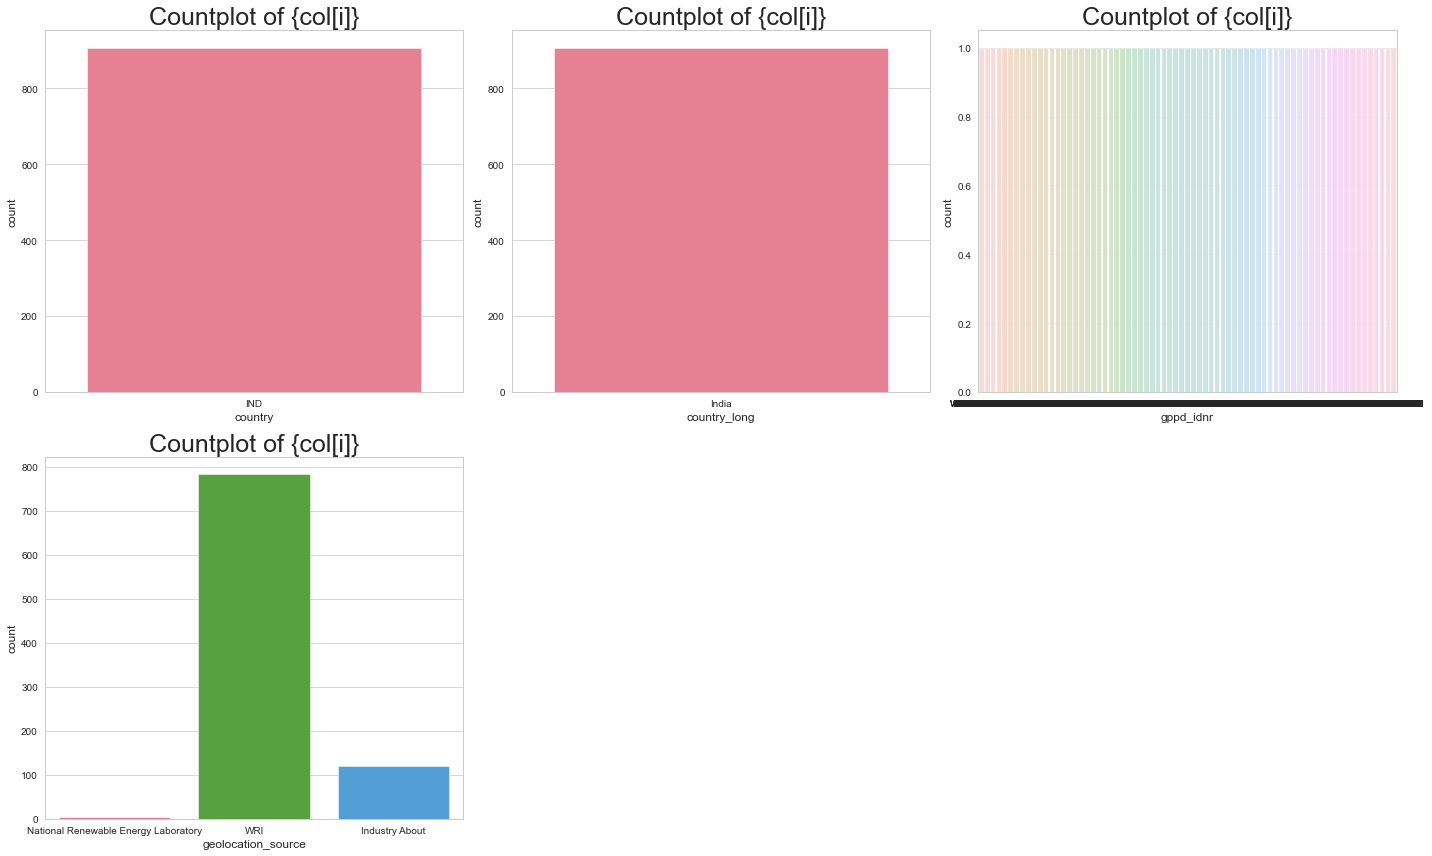

In [255]:
#checking countplot for the feature columns
col=['country','country_long','gppd_idnr','geolocation_source']

plt.figure(figsize=(20,12))
for i in range(0,len(col)):
    plt.subplot(2,3,i+1)
    sns.countplot(df[col[i]],palette='husl')
    plt.title("Countplot of {col[i]}",fontsize=25)
    plt.tight_layout()


Observation:


From 'gppd_idnr', we see that WRI has Count of 400 and IND has count of 500 i.e., count of IND is greater than WRI.

From 'geolocation_source', we can see that WRI has almost 800 Count that is highest and National Renewable energy laboratory is very less which is quite negligible, and Industry About has around 100 counts.

Text(0.5, 1.0, 'Distribution of longitude ')

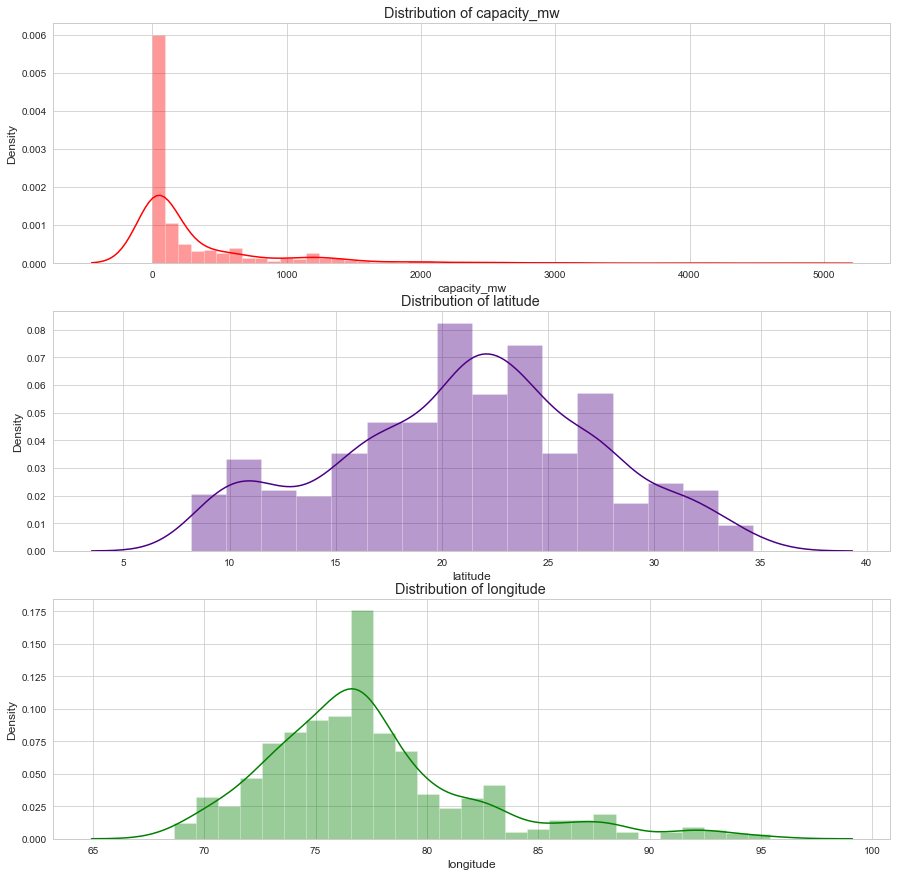

In [256]:
#checking the distribution plot 

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.distplot(df['capacity_mw'],color='r')
plt.title('Distribution of capacity_mw')
plt.subplot(3,1,2)
sns.distplot(df['latitude'],color='indigo')
plt.title('Distribution of latitude ')
plt.subplot(3,1,3)
sns.distplot(df['longitude'],color='green')
plt.title('Distribution of longitude ')



Observation:

1 From distribution of capacity_mw, we can say it has high left peak

2 From latitude, we see that it is has some data point only in middle so it has middle peak only

3 From distribution of longitude,we see that it has right peak only

All the above distribution plots are not normally distributed, it indicates that data is skewed which will be required to be treated accordingly.

# Bivariate Analysis:

Comparing target variable capacity_mw with features

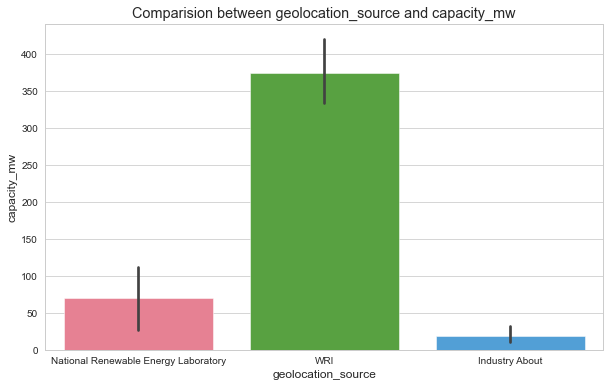

In [257]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
plt.title('Comparision between geolocation_source and capacity_mw')
sns.barplot(x='geolocation_source',y='capacity_mw',data=df,palette='husl')
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

<AxesSubplot:title={'center':'Comparision between primary_fuel and capacity_mw'}, xlabel='primary_fuel', ylabel='capacity_mw'>

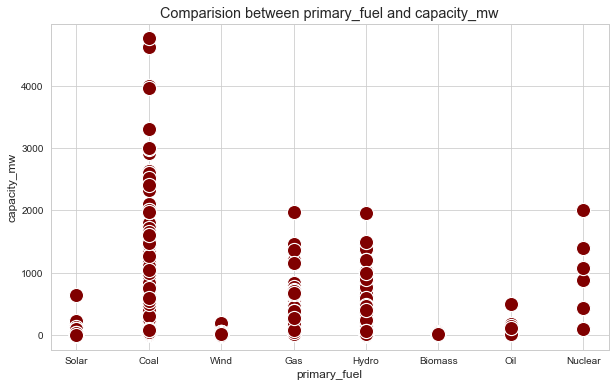

In [258]:
# Let's check how the primary_fuel affects the capacity of the power plant

plt.figure(figsize = (10,6))
plt.title('Comparision between primary_fuel and capacity_mw')
sns.scatterplot(df['primary_fuel'],df['capacity_mw'],color='maroon',s=200)

coal having the high capacity than others

In [259]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

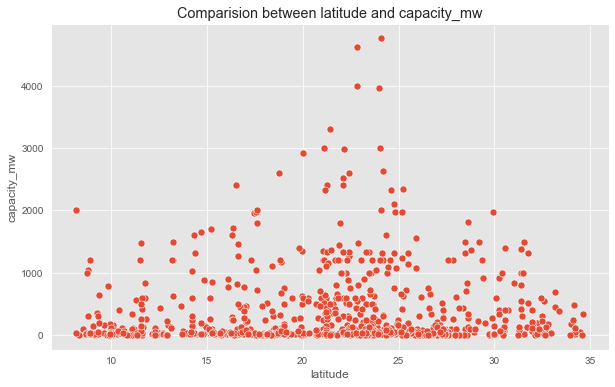

In [260]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"],s=50)

The plot shows that there is no linear relation between latitude and capacity of the power plant.

<AxesSubplot:title={'center':'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

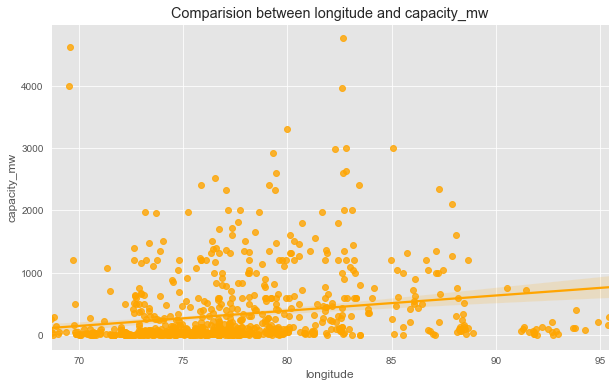

In [261]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"],color='orange')

There is a weak linear relation between longitude and capacity.



<AxesSubplot:title={'center':'Comparision between primary_fuel and capacity_mw'}, xlabel='primary_fuel', ylabel='capacity_mw'>

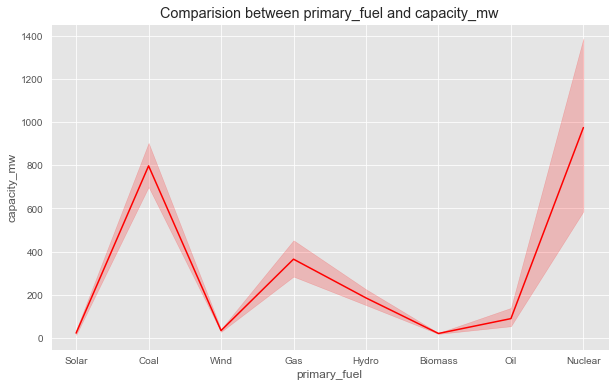

In [262]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between primary_fuel and capacity_mw')
sns.lineplot(df['primary_fuel'],df["capacity_mw"],color='r')

coal having the high capacity than others

<AxesSubplot:title={'center':'Comparision between primary_fuel and latitude'}, xlabel='primary_fuel', ylabel='latitude'>

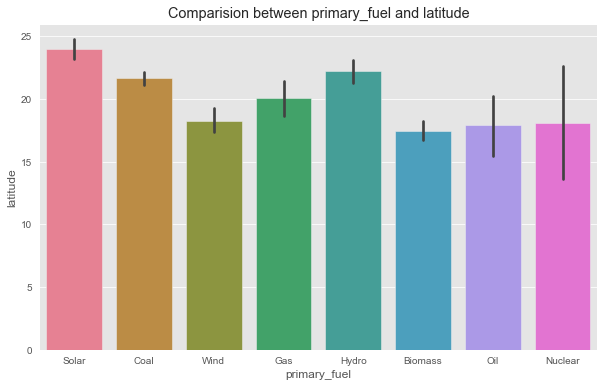

In [263]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between primary_fuel and latitude')
sns.barplot(df['primary_fuel'],df["latitude"],palette='husl')

The primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas.Whereas other fuels have less latitude.

<AxesSubplot:title={'center':'Comparision between primary_fuel and longitude'}, xlabel='primary_fuel', ylabel='longitude'>

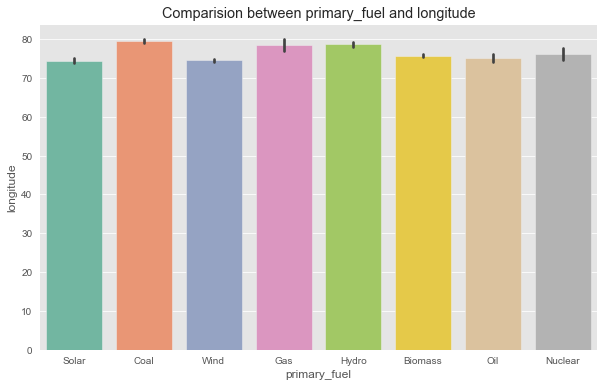

In [264]:
# Let's check how the capacity is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between primary_fuel and longitude')
sns.barplot(df['primary_fuel'],df["longitude"],palette='Set2')

The primary coal has high latitude of 80 followed by Gas, hydro and nuclear.Whereas other fuels have less latitude.

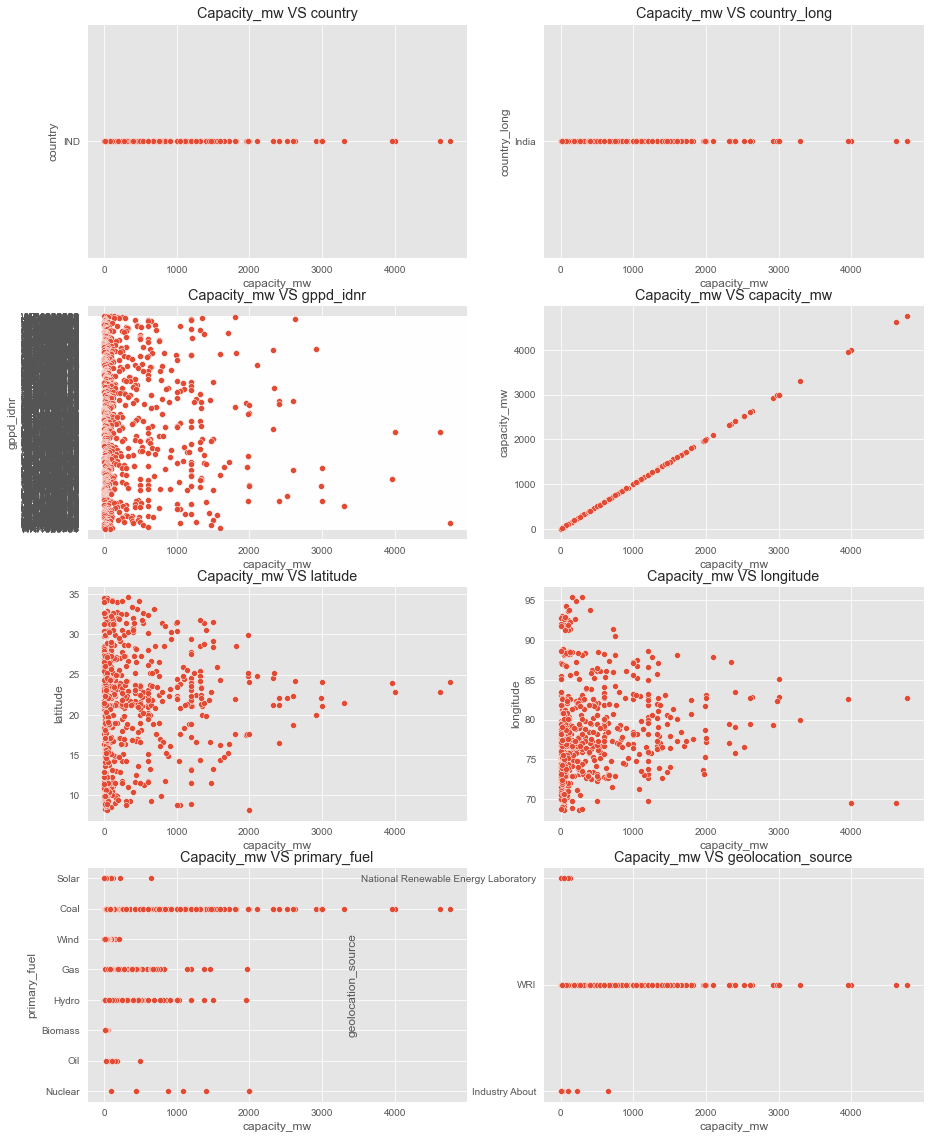

In [265]:
col1=['country', 'country_long', 'gppd_idnr','capacity_mw',
       'latitude', 'longitude', 'primary_fuel',
       'geolocation_source']
#checking the relationship of capacity_mw with the feature columns using scatterplot
plt.style.use('ggplot')
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df['capacity_mw'],y=df[col1[i]])
    plt.title(f"Capacity_mw VS {col1[i]}")

Observation:

1.From primary_fuel vs latitude plot, we can see that hydro fuel type is distributed across all the latitude values from 0 to 35.

2.From primary_fuel vs longitude plot, we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type.

3.From the primary_fuel vs capacity_mw plot, we can see that as capacity increases, consumption of coal increases.

4.From then remaining plots, we see that they contain only one value so doesn't provide much information.

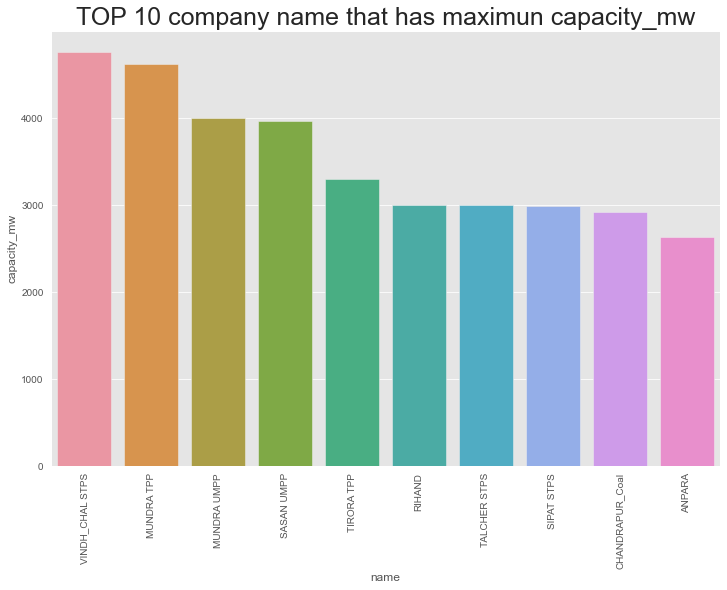

In [266]:
#plotting barplot for capacity_mw vs Name

df1=df.groupby('name')['capacity_mw'].sum()
df1=df1.reset_index()
df1=df1.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1.head(10))
plt.title("TOP 10 company name that has maximun capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation:

We see that vindh_chal stps is the top most company that has the maximun electrical generating capacity.

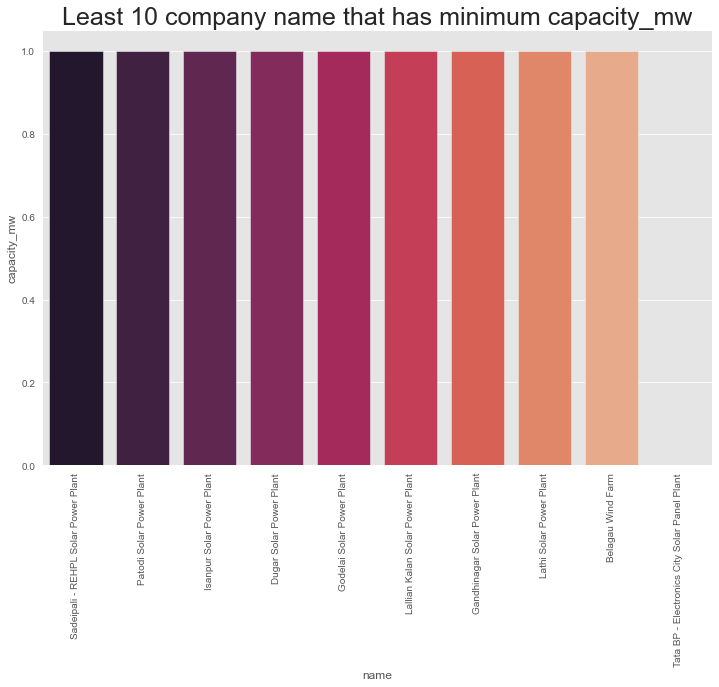

In [267]:
#plotting barplot for capacity_mw vs Name

plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1.tail(10),palette='rocket')
plt.title("Least 10 company name that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation: From the plot above we see that all these 10 company produces only 1mw power

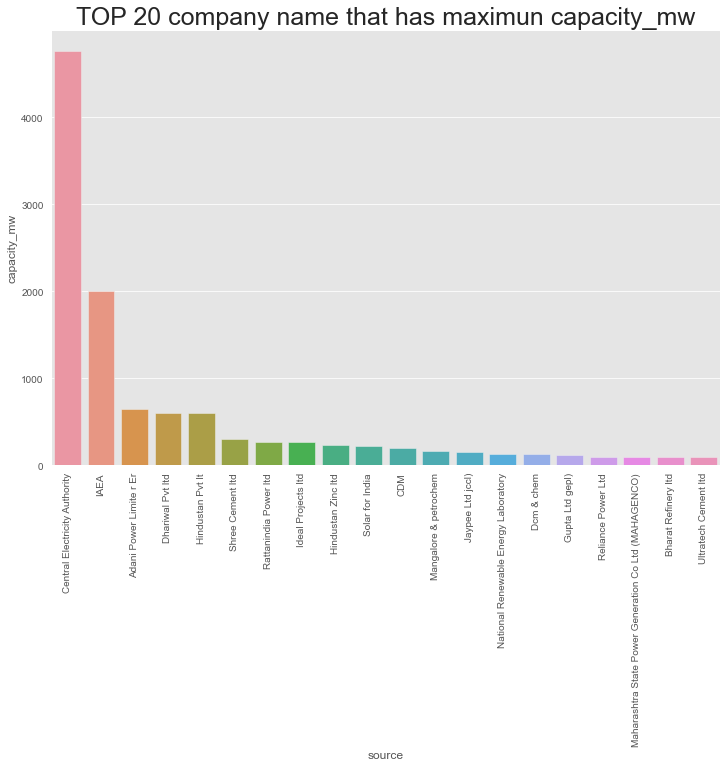

In [268]:

df2=df.groupby('source')['capacity_mw'].max()
df2=df2.reset_index()
df2=df2.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2.head(20))
plt.title("TOP 20 company name that has maximun capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation:

From the above graph, we see that Central Electricity Authority has the highest electrical generating capacity with more than 4000mw and Ultratech Cement ltd has the lowest value of capacity_mw.

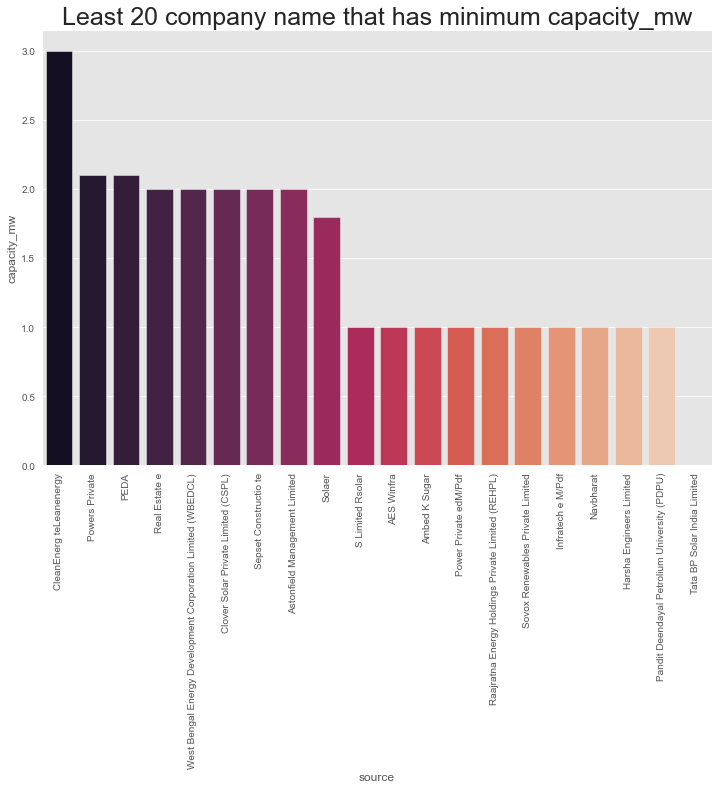

In [269]:


plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2.tail(20),palette='rocket')
plt.title("Least 20 company name that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)
plt.show()

These are the least 20 source that has minimum capacity

<AxesSubplot:ylabel='capacity_mw'>

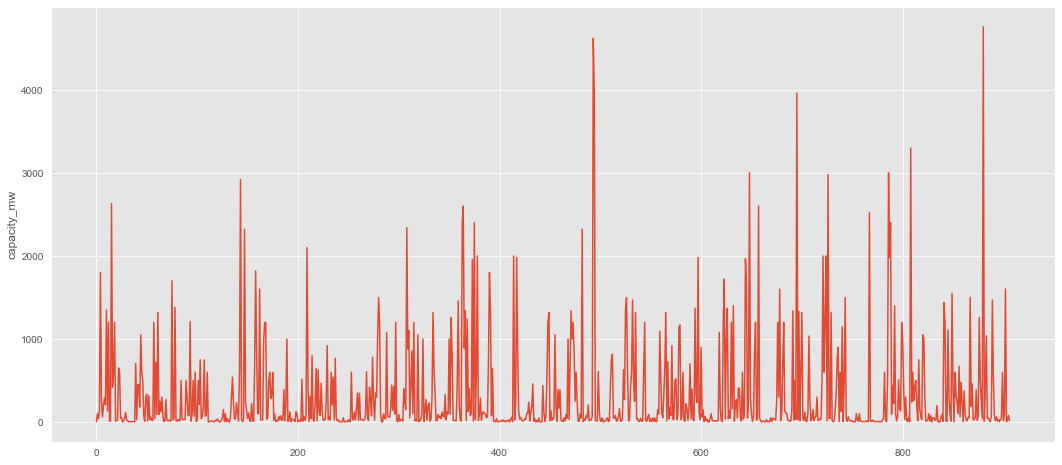

In [270]:
#checking the line plot

plt.figure(figsize=(18,8))
sns.lineplot(data=df['capacity_mw'])

Remarks: We see that the flow in capacity is not increasing continuously with time.

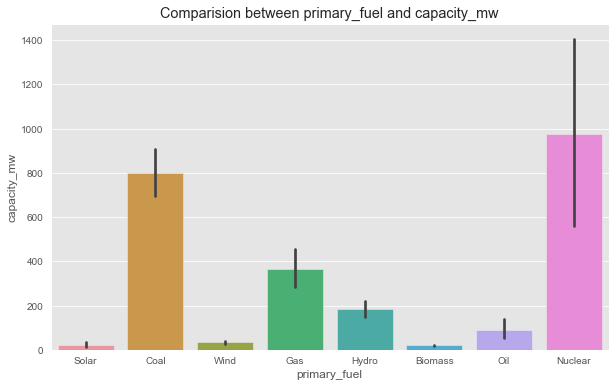

In [275]:
#Lets check the relation between primary_fuel and capacity_mw
plt.figure(figsize = (10,6))
plt.title('Comparision between primary_fuel and capacity_mw')
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

<AxesSubplot:title={'center':'Comparision between longitude and primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

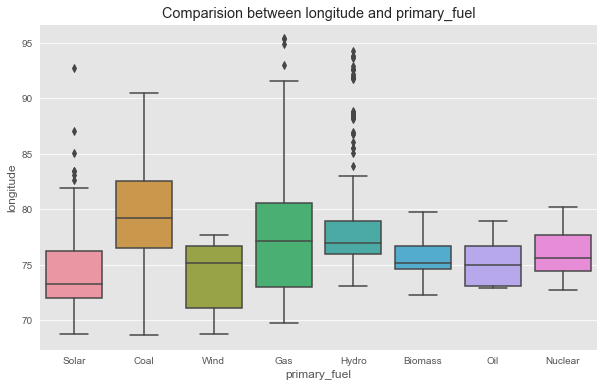

In [276]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
sns.boxplot(df['primary_fuel'],df["longitude"])

The primary_fuel Gas has high longitude followed by Hydro, Solar and Coal. Other fuels have less longitude.



In [325]:
#dropping the columns country, country_long, name, source as they dont help much in our model building
df.drop(['country','country_long','source'],axis=1,inplace=True)
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,817.977250
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2001.0,Industry About,801.123775,711.181225,737.205450,817.977250,817.977250
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250


# Multivariate Analysis

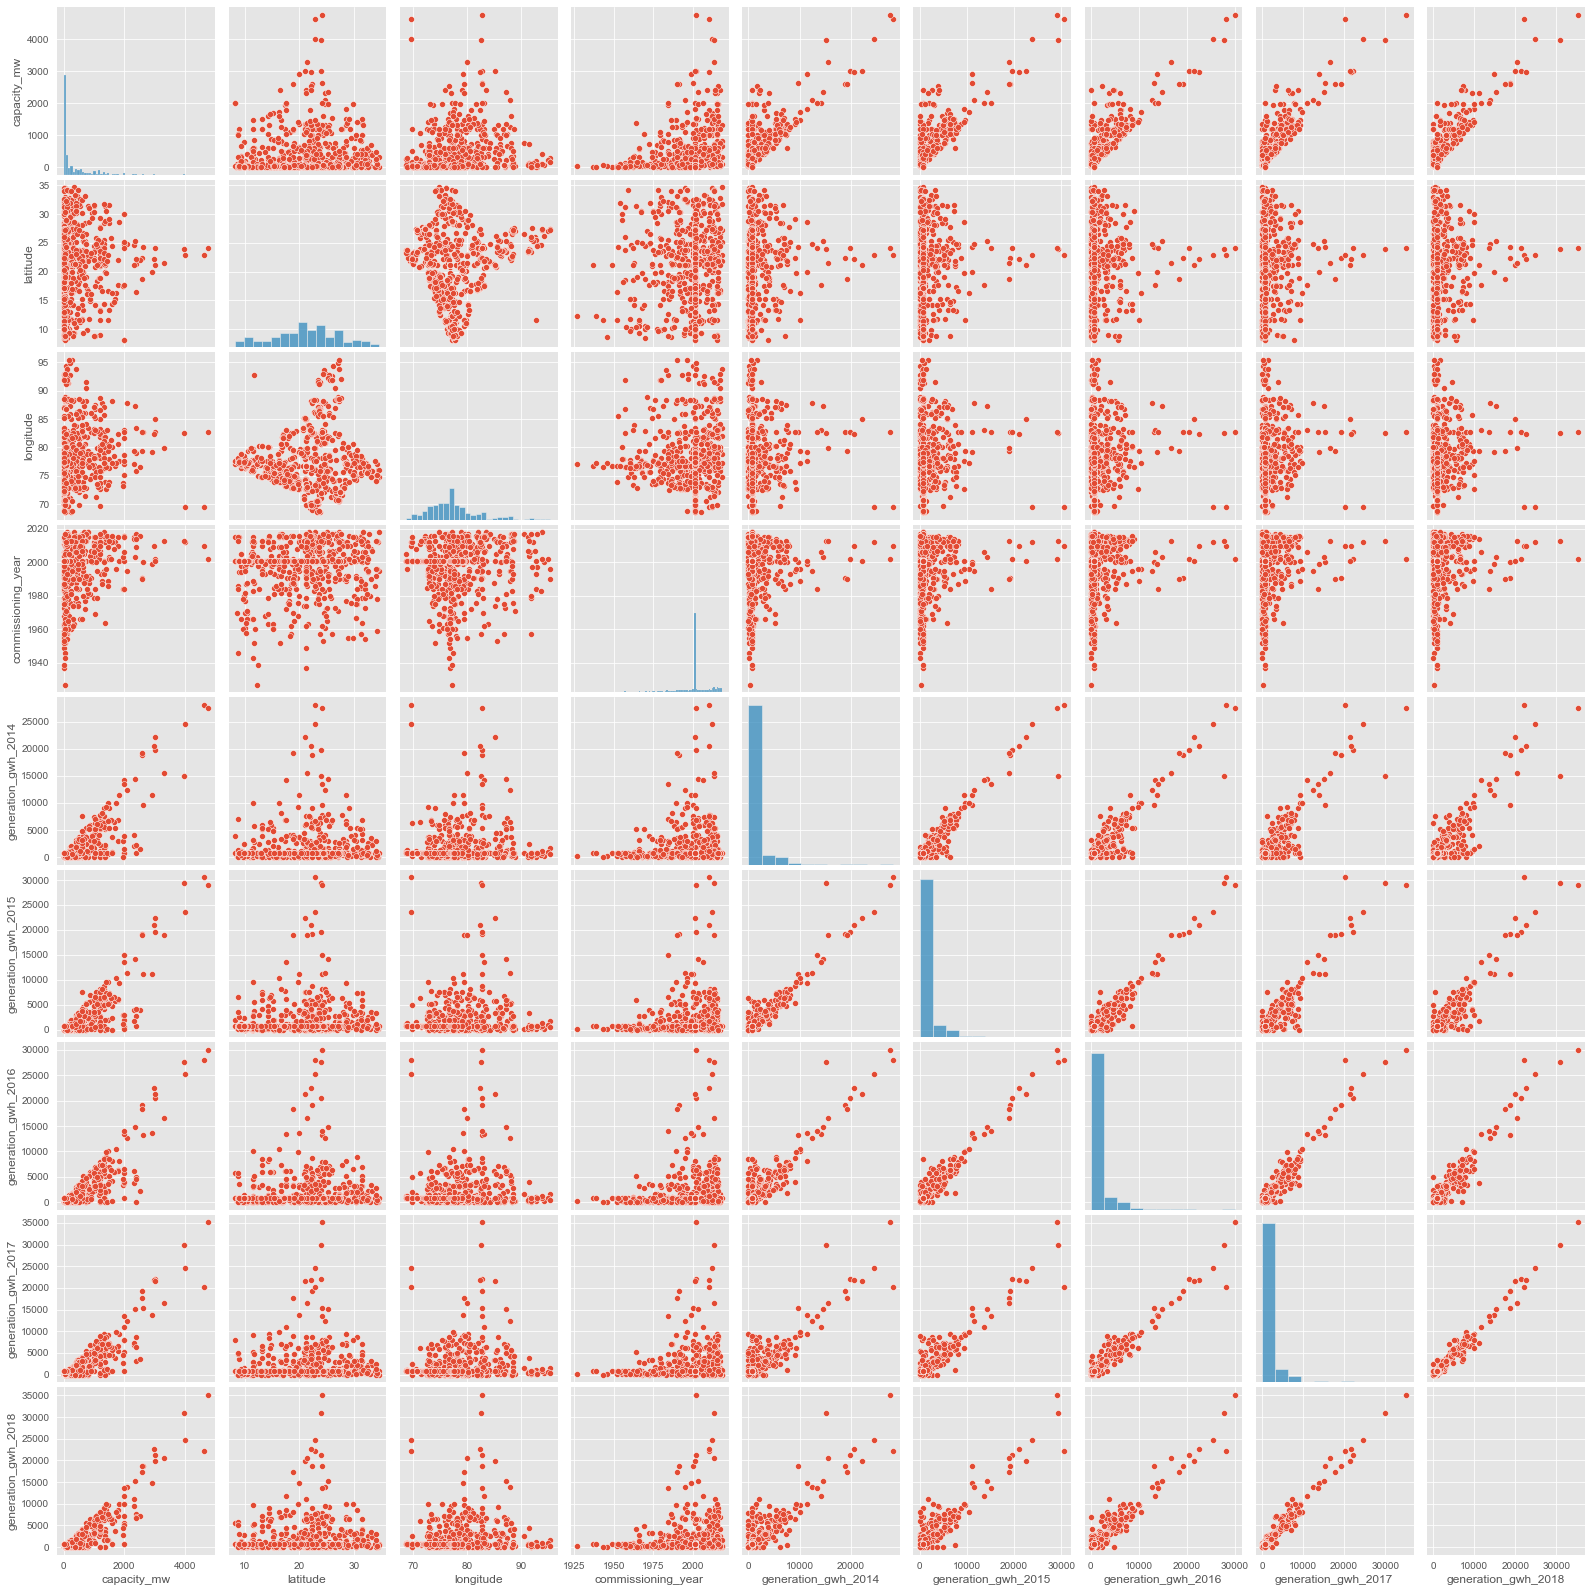

In [274]:
#checking the pairplot

sns.pairplot(df)

Remarks: From the above pair plot, we can see the data distribution amongst the numerical data type columns.

# Checking for Outliers

capacity_mw                AxesSubplot(0.125,0.71587;0.227941x0.16413)
latitude                AxesSubplot(0.398529,0.71587;0.227941x0.16413)
longitude               AxesSubplot(0.672059,0.71587;0.227941x0.16413)
commissioning_year        AxesSubplot(0.125,0.518913;0.227941x0.16413)
generation_gwh_2014    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
generation_gwh_2015    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
generation_gwh_2016       AxesSubplot(0.125,0.321957;0.227941x0.16413)
generation_gwh_2017    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
generation_gwh_2018    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

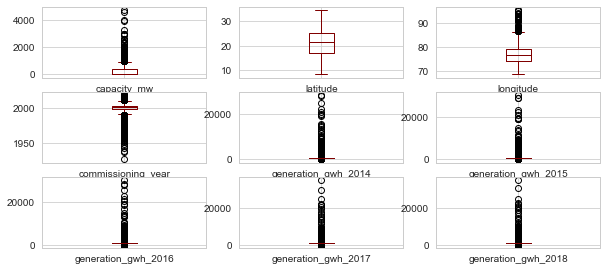

In [186]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,6),color='maroon')

# Removing outliers

Zscore method

In [187]:
#features having outliers

features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]


In [188]:
#using the zscore for removing the outliers

from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.86991672, 0.25702178, 0.26778301, 0.27573671, 0.27556459,
        0.27888721],
       [0.58558978, 0.25702178, 0.26778301, 0.27573671, 0.27556459,
        0.27888721],
       [1.67356683, 0.25702178, 0.26778301, 0.27573671, 0.27556459,
        0.27888721],
       ...,
       [0.38359152, 0.25702178, 0.26778301, 0.27573671, 0.27556459,
        0.27888721],
       [0.76456427, 0.25702178, 0.26778301, 0.27573671, 0.27556459,
        0.27888721],
       [0.0103269 , 0.25702178, 0.26778301, 0.27573671, 0.27556459,
        0.27888721]])

In [189]:
#creating the new dataframe

new_df=df[(z<3).all(axis=1)]
new_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,817.977250
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2001.0,Industry About,801.123775,711.181225,737.205450,817.977250,817.977250
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250


This is the new dataframe after removing outliers.

In [190]:
#checking the dimension for both columns

print(df.shape)
print(new_df.shape)

(907, 14)
(871, 14)


# checking the data loss

In [191]:
loss=(907-891)/907*100
loss

1.7640573318632855

Using zscore method, the data loss is 1.76%. 

In [192]:
#new df after removing the columns

new_df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,817.977250
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,817.977250
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Encoding the categorical columns using Label Encoding

In [193]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['primary_fuel','other_fuel1','geolocation_source']
for val in list:
    new_df[val]=le.fit_transform(new_df[val].astype(str))

In [194]:
#after encoding the data

new_df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2,2011.0,1,801.123775,711.181225,737.205450,817.977250,817.977250
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,2,2001.0,2,801.123775,711.181225,737.205450,817.977250,817.977250
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,2,2001.0,2,801.123775,711.181225,737.205450,817.977250,817.977250
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Correlation

In [195]:
# Checking the correlation between features and label

df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.199299,0.211042,0.793497,0.819676,0.853008,0.868338,0.882289
latitude,0.050984,1.000000,0.036341,0.087937,0.058594,0.053869,0.047677,0.057897,0.054474
longitude,0.199299,0.036341,1.000000,0.029583,0.106855,0.123763,0.145640,0.154014,0.153564
commissioning_year,0.211042,0.087937,0.029583,1.000000,0.076971,0.108752,0.140964,0.153554,0.157690
generation_gwh_2014,0.793497,0.058594,0.106855,0.076971,1.000000,0.963719,0.935067,0.904075,0.895104
generation_gwh_2015,0.819676,0.053869,0.123763,0.108752,0.963719,1.000000,0.973231,0.940229,0.933123
generation_gwh_2016,0.853008,0.047677,0.145640,0.140964,0.935067,0.973231,1.000000,0.973909,0.964961
generation_gwh_2017,0.868338,0.057897,0.154014,0.153554,0.904075,0.940229,0.973909,1.000000,0.986731
generation_gwh_2018,0.882289,0.054474,0.153564,0.157690,0.895104,0.933123,0.964961,0.986731,1.000000


corr() method states the correlation between the dependent and independent variable

<AxesSubplot:>

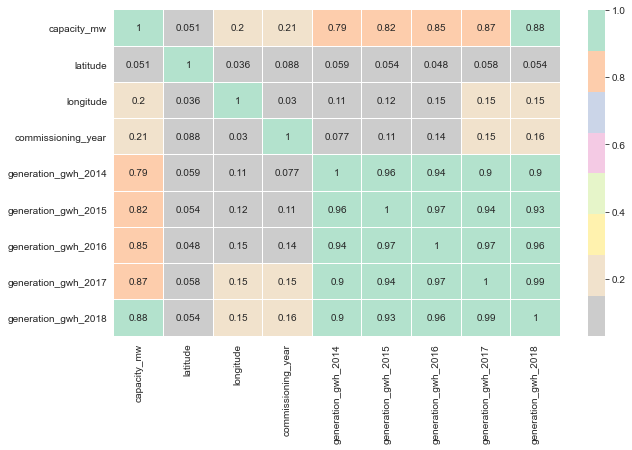

In [196]:
#checking the correlation on Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.1,cmap='Pastel2_r')

This heatmap shows the correlation matrix. We can visualize the relation between the feature to feature and feature to label.This heatmap contains both positive and negative correlation

# Visualizing the correlation between label and features using bar plot

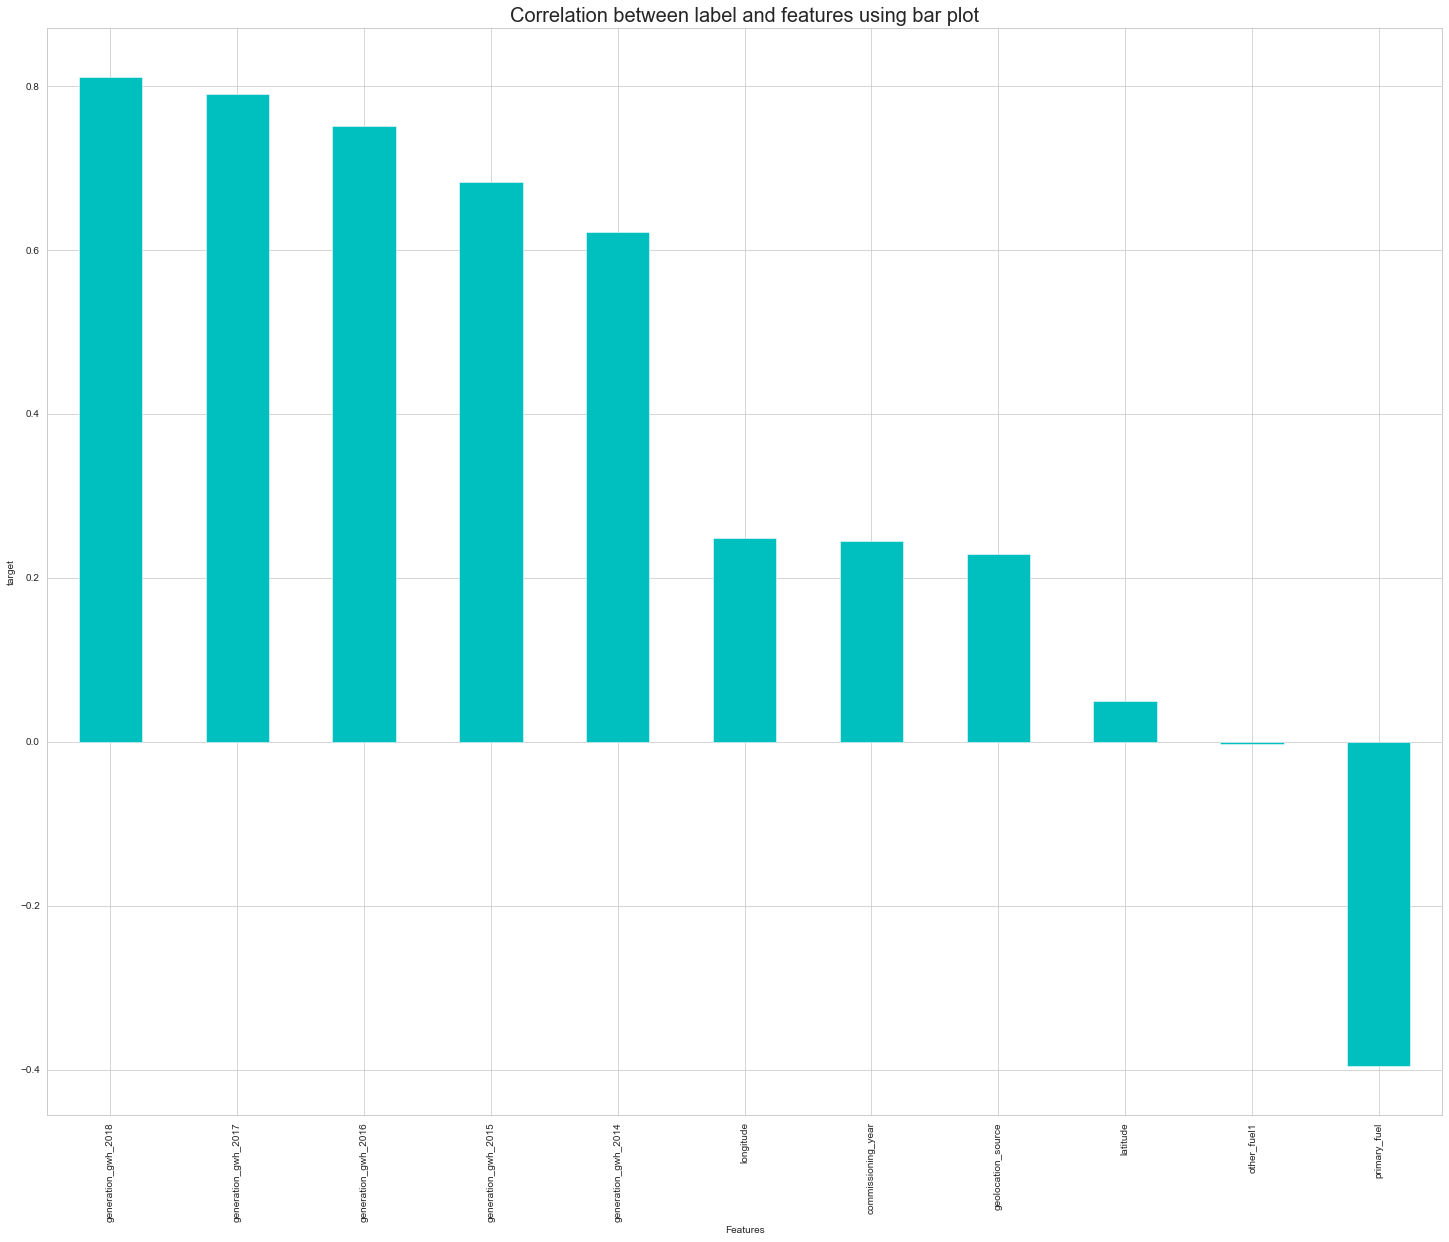

In [197]:
plt.figure(figsize=(25,20))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()


Here we can visualize the positive and negative correlation between the features and the label

In [198]:
# Dropping irrelavant columns
new_df.drop('name',axis=1,inplace=True)
new_df.drop('gppd_idnr',axis=1,inplace=True)



# Checking for MultiColinearity


In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,13.741486,latitude
1,379.381012,longitude
2,4.555606,primary_fuel
3,577.369115,other_fuel1
4,942.869648,commissioning_year
5,10.096169,geolocation_source
6,10.343383,generation_gwh_2014
7,20.391173,generation_gwh_2015
8,22.957666,generation_gwh_2016
9,31.021843,generation_gwh_2017


Multicolineairty is present in many columns.so well will remove it later

# 1. Prediction for capacity_mw

Separating the features and label

In [199]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']

In [202]:
print(x.shape)
print(y.shape)

(871, 11)
(871,)


In [203]:
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,801.123775,711.181225,737.205450,817.977250,817.977250
1,98.0,24.7663,74.6090,1,2,2001.0,2,801.123775,711.181225,737.205450,817.977250,817.977250
2,39.2,21.9038,69.3732,7,2,2001.0,2,801.123775,711.181225,737.205450,817.977250,817.977250
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Checking for Skewness

In [204]:
x.skew()

latitude               -0.111898
longitude               0.960278
primary_fuel            0.426394
other_fuel1           -20.041540
commissioning_year     -1.735483
geolocation_source     -2.105485
generation_gwh_2014     2.978658
generation_gwh_2015     2.752239
generation_gwh_2016     2.682074
generation_gwh_2017     2.581940
generation_gwh_2018     2.629267
dtype: float64

skewness is present

# Removing the Skewness

In [205]:
from sklearn.preprocessing import power_transform

In [206]:
#removing the skewness
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.15902914, -0.93430172,  1.14584255, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [ 0.59208084, -0.51061225, -1.01131189, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [ 0.12088435, -2.3970921 ,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.02258144],
       ...,
       [-0.95486367, -0.23434892,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [ 0.52333628, -0.77230623, -1.01131189, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [-1.80174746,  0.25197169,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.02258144]])

# Feature Scaling using Standard Scalarization

In [207]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x


array([[ 1.15902914, -0.93430175,  1.14584255, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [ 0.59208084, -0.51061227, -1.01131189, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [ 0.12088435, -2.39709212,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.02258144],
       ...,
       [-0.95486367, -0.23434894,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [ 0.52333628, -0.77230625, -1.01131189, ..., -0.03180053,
        -0.02121617, -0.02258144],
       [-1.80174746,  0.25197167,  1.42214149, ..., -0.03180053,
        -0.02121617, -0.02258144]])

our data is now scaled

# Modeling

Finding the best random state

In [264]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8749306754613541 at Random_state 78


We are getting the maximum r2 score as 87% at random state 78.



# Creating new train test split

In [265]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)


# RandomForestRegressor

In [270]:
# Checking R2 score for RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
      

R2_score: 0.8804877164354596
MAE: 76.4574015915338
MSE: 21085.38655655595
RMSE: 145.2080802040849


The R2 score value for Random Forest Regressor model is 85%

# DecisionTreeRegressor

In [271]:
# Checking R2 score for DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
      

R2_score: 0.6765473945505958
MAE: 105.5912748091603
MSE: 57066.29490468052
RMSE: 238.88552677941902


# KNeighbors Regressor

In [272]:
# Checking R2 score for KNNRegressor

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
      

R2_score: 0.8228002577626199
MAE: 99.38775801526718
MSE: 31263.104940836485
RMSE: 176.8137577815609


# GradientBoosting Regressor

In [273]:
# Checking R2 score for GradientboostingRegressor

gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
      

R2_score: 0.8540343199665175
MAE: 82.13517193612672
MSE: 25752.52263366268
RMSE: 160.4759254021072


# ExtraTreesRegressor

In [275]:
# Checking R2 score for ExtratreeRegressor

et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred=et.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
      

R2_score: 0.8808698872618944
MAE: 75.21570477099236
MSE: 21017.960687300718
RMSE: 144.97572447586086


# LinearRegression

In [276]:
# Checking R2 score for ExtratreeRegressor

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
      

R2_score: 0.49512716810015844
MAE: 229.95474587552366
MSE: 89074.01402603423
RMSE: 298.4526998136124


# Checking the cross validation score

In [278]:
# Checking cv score for RandomForestRegressor
from sklearn.model_selection import cross_val_score

print(cross_val_score(rfr,x,y,cv=5).mean())

0.7713342904297905


In [279]:
# Checking cv score for DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

print(cross_val_score(dt,x,y,cv=5).mean())

0.5570113081777799


In [280]:
# Checking cv score for Knn
from sklearn.model_selection import cross_val_score

print(cross_val_score(knn,x,y,cv=5).mean())

0.725617371182725


In [281]:
# Checking cv score for GradientBoosting
from sklearn.model_selection import cross_val_score

print(cross_val_score(gb,x,y,cv=5).mean())

0.721928157734989


In [282]:
# Checking cv score for LinearRegression
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr,x,y,cv=5).mean())

0.4526596647669951


In [283]:
# Checking cv score for ExtraTree
from sklearn.model_selection import cross_val_score

print(cross_val_score(et,x,y,cv=5).mean())

0.7862629654828904


From the above observation, the difference between R2score and the cross validation score we conclude that ExtraTree as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

# Hyper parameter tuning

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
# ExtraTreeRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}
gcv=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)

In [287]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [288]:
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

These are the best parameter values for ExtraTreetRegressor

In [301]:
capacity=ExtraTreesRegressor(criterion='mse',max_depth=6,max_features='auto',n_estimators=200)
capacity.fit(x_train,y_train)
pred=capacity.predict(x_test)
print('RMSE Value',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score',r2_score(y_test,pred)*100)

RMSE Value 142.7218005667435
R2_Score 88.4545302010322


our r2 score is incresed from 88.08%
to 88.45%  after doing tunning 

# Saving the model

In [314]:
import joblib

joblib.dump(capacity,'Global_Power_Plant_capacity_mw.pkl')

['Global_Power_Plant_capacity_mw.pkl']

In [315]:
capacity=joblib.load('Global_Power_Plant_capacity_mw.pkl')

In [318]:
a=np.array(y_test)
predicted=np.array(capacity.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,60.0,97.743345
1,30.0,47.766963
2,62.6,73.764117
3,45.0,102.184631
4,250.0,372.550921
...,...,...
257,1035.0,1136.620399
258,40.0,77.352558
259,3.6,47.766963
260,120.0,101.075409


# 2. Prediction for primary_fuel

Separating features and labels

In [213]:
x_df=new_df.drop(['primary_fuel'],axis=1)
y_df=new_df['primary_fuel']

In [214]:
print(x_df.shape)
print(y_df.shape)

(871, 11)
(871,)


# Checking for Skewness

In [216]:
x_df.skew()

capacity_mw             2.207091
latitude               -0.111898
longitude               0.960278
other_fuel1           -20.041540
commissioning_year     -1.735483
geolocation_source     -2.105485
generation_gwh_2014     2.978658
generation_gwh_2015     2.752239
generation_gwh_2016     2.682074
generation_gwh_2017     2.581940
generation_gwh_2018     2.629267
dtype: float64

We can observe skewness in almost all the columns. So except categorical columns, we will remove the skewness of all the rest columns.

# Removing Skewness


In [217]:
#removing the skewness
x_df=power_transform(x,method='yeo-johnson')
x_df

array([[ 1.16891632e+00, -9.34305729e-01,  1.15034953e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [ 5.80139259e-01, -5.10801168e-01, -1.01064328e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [ 1.00190819e-01, -2.39595556e+00,  1.43415555e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       ...,
       [-9.55635796e-01, -2.34608065e-01,  1.43415555e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [ 5.09518593e-01, -7.72390771e-01, -1.01064328e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [-1.76059820e+00,  2.51715354e-01,  1.43415555e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03]])

# scaling the data

In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_df=scaler.fit_transform(x_df)
x_df


array([[ 1.16891632e+00, -9.34305729e-01,  1.15034953e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [ 5.80139259e-01, -5.10801168e-01, -1.01064328e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [ 1.00190819e-01, -2.39595556e+00,  1.43415555e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       ...,
       [-9.55635796e-01, -2.34608065e-01,  1.43415555e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [ 5.09518593e-01, -7.72390771e-01, -1.01064328e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03],
       [-1.76059820e+00,  2.51715354e-01,  1.43415555e+00, ...,
        -8.73129161e-03, -1.11070789e-03, -2.54705604e-03]])

now our data is scaled

In [428]:
y_df.value_counts()

3    240
1    238
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Here we can observe that the target variabe primary_fuel has multiclasses which means it is a multiclassification problem.

Also the data is not balanced so we will use oversampling method to balance the data.

# OverSampling

In [430]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_df,y_df = sm.fit_resample(x_df,y_df)

In [431]:
y_df.value_counts()

0    240
1    240
2    240
3    240
4    240
5    240
6    240
7    240
Name: primary_fuel, dtype: int64

Since the highest count of the target is 240 so the data is balanced by oversampling all the classes to the count 240.

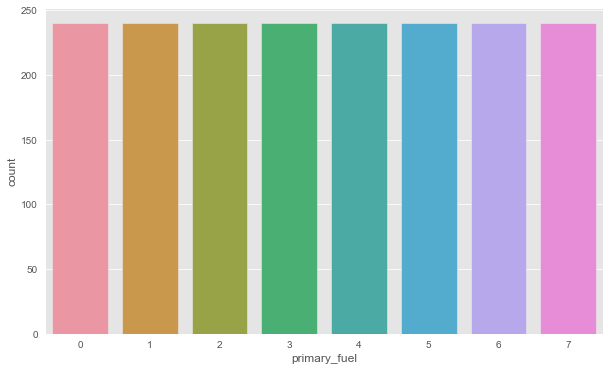

In [432]:
#visualize the data after balancing

plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

Here we can clearly visualize the data in all the types are eqaul.



# Modeling


Finding the best random state

In [433]:
from sklearn.tree import DecisionTreeClassifier

maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_df_train,y_df_train)
    pred = dt.predict(x_df_test)
    acc = accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 1.0 at random_state 1


# Creating train_test_split


In [434]:
 x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)


We have now splitted the data using the random state which is providing best accuracy

# Classification Algorithms


In [440]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# DecisionTreeClassifier


In [437]:
# Checking R2 score for DecisionTreeclassifier

dt=DecisionTreeRegressor()
dt.fit(x_df_train,y_df_train)
pred=dt.predict(x_df_test)
print(accuracy_score(y_df_test,pred))
print(confusion_matrix(y_df_test,pred))
print(classification_report(y_df_test,pred))
    

1.0
[[69  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0]
 [ 0  0  0 84  0  0  0  0]
 [ 0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        75
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        66

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



# RandomForestClassifier

In [438]:
# Checking R2 score for RandomForestClassifier

rf=RandomForestRegressor()
rf.fit(x_df_train,y_df_train)
pred=rf.predict(x_df_test)
print(accuracy_score(y_df_test,pred))
print(confusion_matrix(y_df_test,pred))
print(classification_report(y_df_test,pred))
    

1.0
[[69  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0]
 [ 0  0  0 84  0  0  0  0]
 [ 0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        75
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        66

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



# Support Vector Machine Classifier


In [441]:
# Checking R2 score for Support Vector Machine Classifier

svc=SVC()
svc.fit(x_df_train,y_df_train)
pred=svc.predict(x_df_test)
print(accuracy_score(y_df_test,pred))
print(confusion_matrix(y_df_test,pred))
print(classification_report(y_df_test,pred))

0.9826388888888888
[[69  0  0  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0]
 [ 0  0  2 79  3  0  0  0]
 [ 0  0  0  4 69  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      0.99      0.99        71
           2       0.96      1.00      0.98        67
           3       0.95      0.94      0.95        84
           4       0.96      0.95      0.95        73
           5       1.00      1.00      1.00        75
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        66

    accuracy                           0.98       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



# KNeighborsClassifier


In [442]:
# Checking R2 score for knn

knn=KNeighborsClassifier()
knn.fit(x_df_train,y_df_train)
pred=knn.predict(x_df_test)
print(accuracy_score(y_df_test,pred))
print(confusion_matrix(y_df_test,pred))
print(classification_report(y_df_test,pred))

0.9305555555555556
[[69  0  0  0  0  0  0  0]
 [ 0 63  7  1  0  0  0  0]
 [ 0  3 62  1  0  0  1  0]
 [ 0  4 16 62  1  0  1  0]
 [ 0  0  3  2 68  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.90      0.89      0.89        71
           2       0.70      0.93      0.80        67
           3       0.94      0.74      0.83        84
           4       0.99      0.93      0.96        73
           5       1.00      1.00      1.00        75
           6       0.97      1.00      0.99        71
           7       1.00      1.00      1.00        66

    accuracy                           0.93       576
   macro avg       0.94      0.94      0.93       576
weighted avg       0.94      0.93      0.93       576



# GradientBoostingClassifier

In [443]:
# Checking R2 score for GradientBoostingclassifier

gb=GradientBoostingClassifier()
gb.fit(x_df_train,y_df_train)
pred=gb.predict(x_df_test)
print(accuracy_score(y_df_test,pred))
print(confusion_matrix(y_df_test,pred))
print(classification_report(y_df_test,pred))

1.0
[[69  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0]
 [ 0  0  0 84  0  0  0  0]
 [ 0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        75
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        66

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



# Checking the cross Validation Score

In [444]:
# cv score for DecisionTreeClassifier
print(cross_val_score(dt,x_df,y_df,cv=5).mean())

1.0


In [445]:
# cv score for RandomForestClassifier
print(cross_val_score(rf,x_df,y_df,cv=5).mean())

0.9996930795955372


In [446]:
# cv score for SVC
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.9885416666666667


In [448]:
# cv score for KNNClassifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.9546875


In [449]:
# cv score for GradientBoostingClassifier
print(cross_val_score(gb,x_df,y_df,cv=5).mean())

0.9989583333333332


we get 100% accuracy_score and our cv_score is also 100% soo there is no need to do hyperparameter tunning

# SAVING THE MODEL

In [470]:
# Saving the model using .pkl
import joblib
joblib.dump(primary_fuel,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

In [471]:
#loading the model

model = joblib.load('Global_Power_Plant_Fuel_Type.pkl')

In [472]:
a = np.array(y_df_test)
predicted = np.array(model.predict(x_df_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1,1
1,2,2
2,2,2
3,6,6
4,1,1
...,...,...
571,1,1
572,3,3
573,6,6
574,3,3


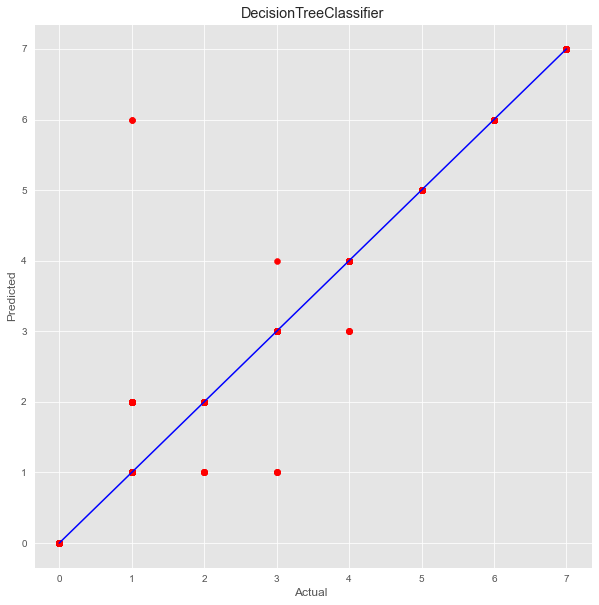

In [474]:
# Prediction Visualization

plt.figure(figsize=(10,10))
plt.scatter(y_df_test,pred,c='r')
plt1=max(max(pred),max(y_df_test))
plt2=min(min(pred),min(y_df_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual ')
plt.ylabel('Predicted')
plt.title('DecisionTreeClassifier')
plt.show()

# Conclusion:

In this model analysis, we build two models- (a) which can predict capacity_mw and (b) which can predict primary_fuel.

For the capacity_mw model, we did lot of EDA to understand the importnace of feature over target column.


We did feature engineering also.

We build a Regression model for the target column 'capacity_mw' and as ExtraTreeRegressor gave good accuracy and good metrics score so we chose it as our final model.

For building the second model i.e., classification model, we used upsampling SMOTE as it doesn't paste the sample again and again but it does sampling synthetically.

Later we applied classifier algorithms and found that DecisionTreeClassifier was giving good metrics as compared to other classifiers so we proceeded with DecisionTreeClassifier to build our final classification model.
